# Solar energy

### First insight

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
df_country = pd.read_csv(path + "solar_generation_by_country.csv")
df_country.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_station = pd.read_csv(path + "solar_generation_by_station.csv")
df_station.tail(2)

,time_step,AT11,AT21,AT12,AT31,AT32,AT22,AT33,AT34,AT13,BE21,BE31,BE32,BE33,BE22,BE34,BE35,BE23,BE10,BE24,BE25,BG32,BG33,BG31,BG34,BG41,BG42,CZ06,CZ03,CZ08,CZ01,CZ05,CZ04,CZ02,CZ07,DEA5,DE30,DE40,DE91,DE50,DED1,DE71,DEE1,DEA4,DED2,DEA1,DE13,DE72,DEE2,DE60,DE92,DE12,DE73,DEB1,DEA2,DED3,DE93,DEE3,DE80,DE25,DEA3,DE22,DE21,DE24,DE23,DEB3,DEF0,DE27,DE11,DEG0,DEB2,DE14,DE26,DE94,ES61,ES24,ES12,ES13,ES41,ES42,ES51,ES30,ES52,ES43,ES11,ES53,ES23,ES22,ES21,ES62,FI20,FI1C,FI1D,FI1B,FI19,FR42,FR61,FR72,FR25,FR26,FR52,FR24,FR21,FR83,FR43,FR23,FR10,FR81,FR63,FR41,FR62,FR30,FR51,FR22,FR53,FR82,FR71,EL51,EL30,EL63,EL53,EL62,EL54,EL52,EL43,EL42,EL65,EL64,EL61,EL41,HU33,HU23,HU32,HU31,HU21,HU10,HU22,CH02,CH03,CH05,CH01,CH07,CH06,CH04,IE01,IE02,ITF1,ITF5,ITF6,ITF3,ITH5,ITH4,ITI4,ITC3,ITC4,ITI3,ITF2,ITC1,ITF4,ITG2,ITG1,ITI1,ITH2,ITI2,ITC2,ITH3,NL13,NL23,NL12,NL22,NL11,NL42,NL41,NL32,NL21,NL31,NL34,NL33,NO04,NO02,NO01,NO03,NO05,PL51,PL61,PL31,PL43,PL11,PL21,PL12,PL52,PL32,PL34,PL63,PL22,PL33,PL62,PL41,PL42,PT18,PT15,PT16,PT17,PT11,RO32,RO12,RO21,RO11,RO31,RO22,RO41,RO42,SE32,SE31,SE12,SE33,SE21,SE11,SE22,SE23,SK01,SK03,SK04,SK02,UKH2,UKJ1,UKD6,UKK3,UKD1,UKF1,UKK4,UKK2,UKH1,UKE1,UKL2,UKM2,UKH3,UKK1,UKD3,UKJ3,UKG1,UKM6,UKI3UKI4,UKJ4,UKD4,UKF2,UKF3,UKD7,UKM5,UKE2,UKN0,UKC2,UKI5UKI6,UKG2,UKM3,UKE3,UKJ2,UKC1,UKG3,UKL1,UKE4
262966,262967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262967,262968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Columns: 261 entries, time_step to UKE4
dtypes: float64(259), int64(2)
memory usage: 523.6 MB


In [6]:
df_station.shape

(262968, 261)

In [7]:
df_country.shape

(262968, 29)

In [8]:
df_station.dtypes

time_step      int64
AT11         float64
AT21         float64
AT12         float64
AT31         float64
              ...   
UKJ2         float64
UKC1         float64
UKG3         float64
UKL1         float64
UKE4         float64
Length: 261, dtype: object

In [9]:
#df_station.describe()

In [10]:
#df_country.describe()

### Dealing with timestamps

In [11]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=df_country.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [12]:
df_country, df_station = add_time(df_country), add_time(df_station)
df_country.tail(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


In [13]:
#df_country.dtypes

Efficiency of wind stations per country during the last day (31th december 2015)

# Exploratory Data Analysis

### If we consider all values even during nights

Text(0.5, 1.0, 'Efficiency of wind stations per country during the last day (31th december 2015)')

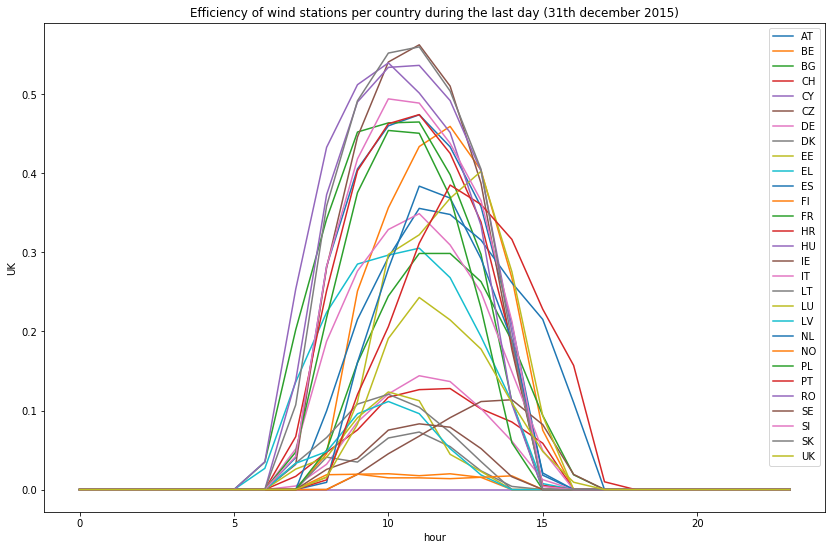

In [14]:
temp_df = df_country[df_country.columns.difference(['time', 'month', 'week'])][-24:]
plt.figure(figsize=(14, 9))
for c in temp_df.columns:
    if c != 'hour':
        sns.lineplot(x="hour", y=c, data=temp_df, label=c)
        #plt.legend(c)
plt.title("Efficiency of wind stations per country during the last day (31th december 2015)")

Text(0.5, 1.0, 'Efficiency of wind stations per country during the day')

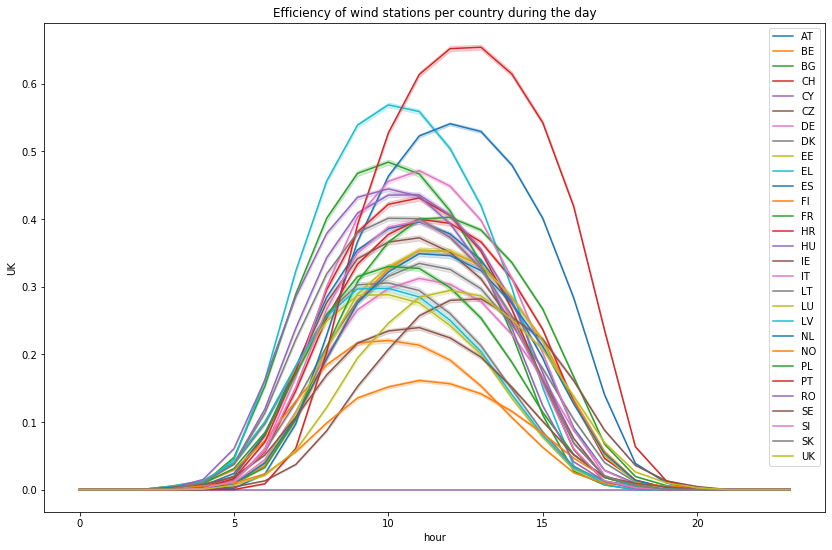

In [15]:
temp_df = df_country[df_country.columns.difference(['time', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for c in temp_df.columns:
    if c != 'hour':
        sns.lineplot(x="hour", y=c, data=temp_df, label=c)
        #plt.legend(c)
plt.title("Efficiency of wind stations per country during the day")

Distribution of the station's efficiency for non null values (ie during the day)

Text(0.5, 1.0, "Distribution of the station's efficiency for non null values (ie during the day)")

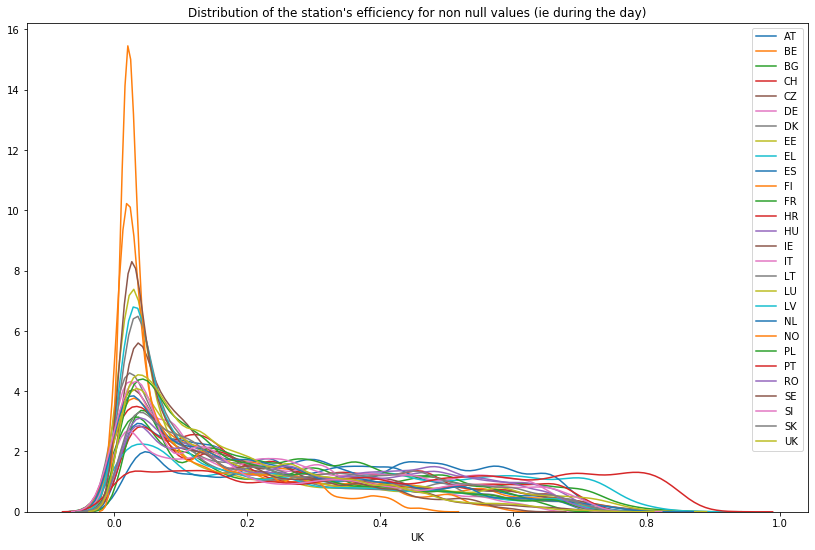

In [16]:
temp_df = df_country[df_country.columns.difference(['time', 'hour', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency for non null values (ie during the day)")

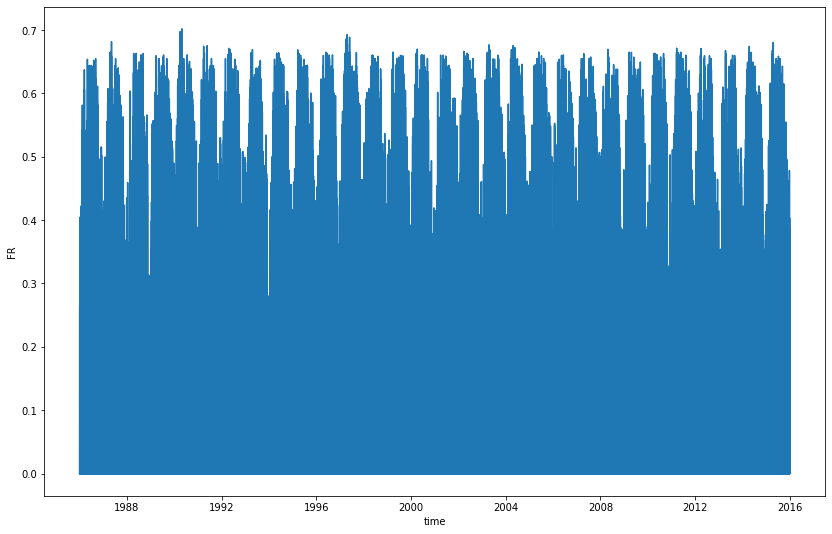

In [17]:
plt.figure(figsize=(14, 9))
sns.lineplot(x = df_country.time, y = df_country['FR'])

Text(0.5, 1.0, 'Efficiency across the months per country')

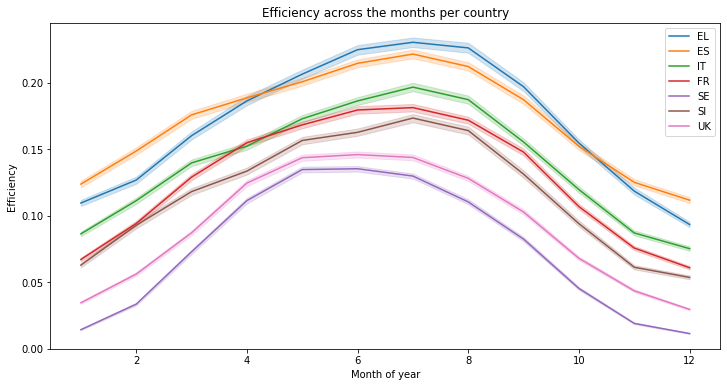

In [18]:
countries = ['EL', 'ES', 'IT', 'FR', 'SE', 'SI', 'UK']

plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_country[[c, 'month']]
    sns.lineplot(x=temp_df["month"], y=temp_df[c], label=c)
plt.xlabel("Month of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the months per country")

Text(0.5, 1.0, 'Efficiency across the weeks per country')

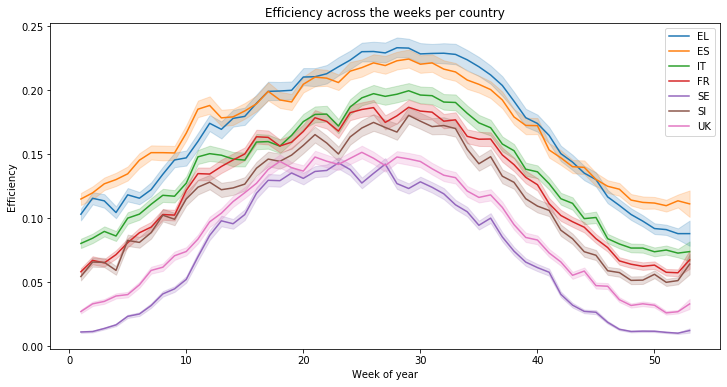

In [19]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_country[[c, 'week']]
    sns.lineplot(x=temp_df["week"], y=temp_df[c], label=c)
plt.xlabel("Week of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the weeks per country")

In [72]:
temp_df = df_country.copy()
temp_df[]

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,0,1,1
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1,1,1
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,2,1,1
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,3,1,1
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 19:00:00,19,12,53
262964,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 20:00:00,20,12,53
262965,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 21:00:00,21,12,53
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53


### If we consider ONLY values between 5 AM & 10 PM

In [21]:
temp_df = df_country[(5 < df_country.hour) & (df_country.hour < 22)]
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week'])
temp_df.describe()

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
count,175312.000000,175312.000000,175312.000000,175312.000000,175312.0,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000
mean,0.187375,0.167761,0.211332,0.191551,0.0,0.173989,0.145890,0.158031,0.130057,0.257699,0.099533,0.191680,0.251305,0.189441,0.205278,0.130836,0.208158,0.137387,0.169600,0.133908,0.164903,0.075220,0.150881,0.312295,0.204717,0.174720,0.190402,0.110849,0.138122
std,0.191641,0.196598,0.235233,0.197423,0.0,0.204288,0.164735,0.193138,0.184175,0.228028,0.142873,0.187002,0.254603,0.216304,0.216774,0.154227,0.210027,0.185721,0.208633,0.182718,0.192138,0.103796,0.179316,0.289589,0.211509,0.210235,0.205251,0.143388,0.155162
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.131469,0.086994,0.111277,0.129509,0.0,0.085148,0.083737,0.068728,0.030330,0.233841,0.020212,0.147011,0.181794,0.097092,0.123373,0.070768,0.150240,0.041170,0.074478,0.037939,0.087032,0.025330,0.078544,0.253450,0.133705,0.072094,0.111629,0.039507,0.081756
75%,0.335664,0.275935,0.392289,0.337995,0.0,0.304388,0.253124,0.260958,0.204804,0.458925,0.157080,0.339958,0.468308,0.336635,0.385769,0.206352,0.374540,0.214504,0.275882,0.212970,0.273413,0.111076,0.240816,0.574163,0.386842,0.311406,0.350063,0.178732,0.221335
max,0.715303,0.827508,0.874000,0.729027,0.0,0.839168,0.665372,0.811149,0.781104,0.793842,0.615942,0.701985,0.863731,0.755825,0.725937,0.770459,0.736446,0.775144,0.826059,0.767614,0.812309,0.487921,0.761651,0.911096,0.722990,0.759005,0.742591,0.634736,0.764852


In [22]:
def plot_by_country(_df, title, nb_col):
    _df = _df.describe().iloc[nb_col, :]
    plt.figure(figsize=(14, 6))
    sns.barplot(x=_df.index, y=_df.values)
    plt.title(title)

#plot_by_country("Mean efficiency by country", 1)

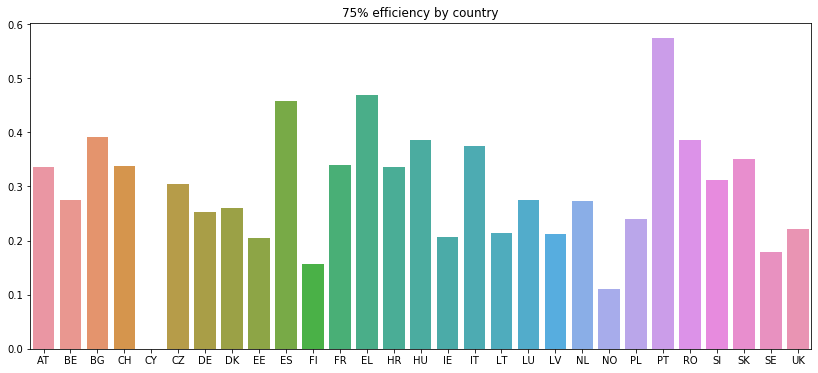

In [23]:
plot_by_country(temp_df, "75% efficiency by country", 6)

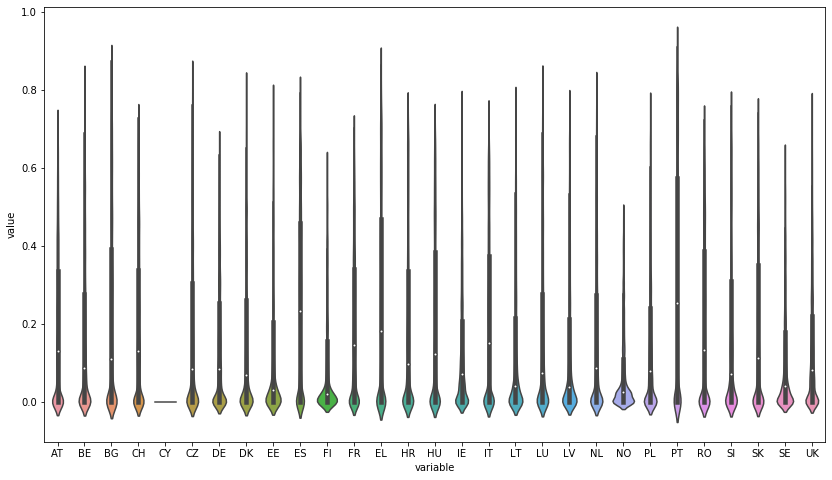

In [24]:
# credits : https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# This works because pd.melt converts a wide-form dataframe
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", data=pd.melt(temp_df))

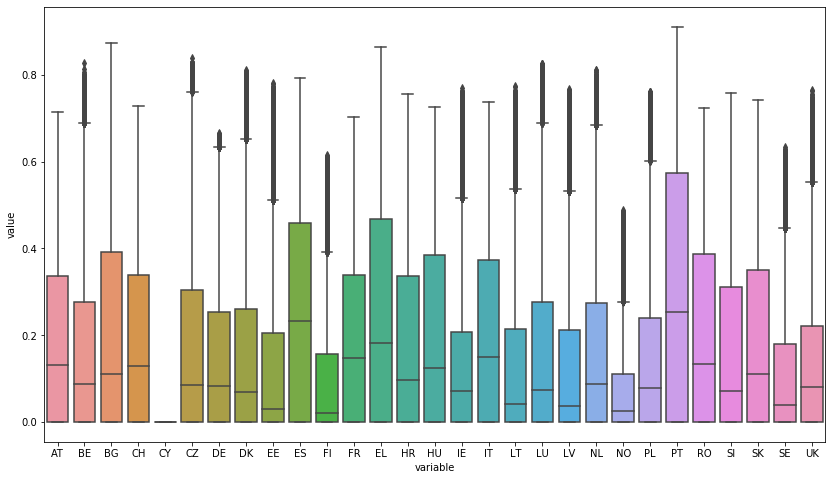

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(temp_df))

Text(0.5, 1.0, "Distribution of the station's efficiency")

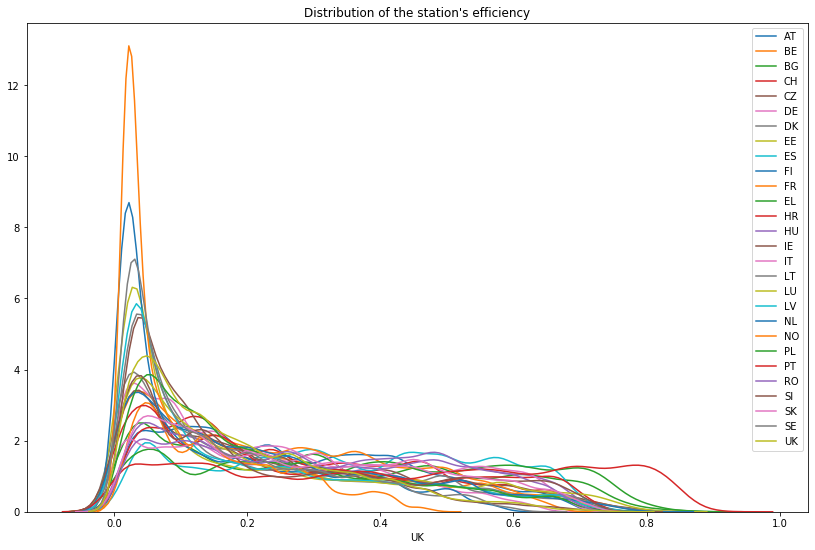

In [30]:
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

## Correlations

In [68]:
def plot_corr(df_):
    corr = df_.corr()
    corr

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

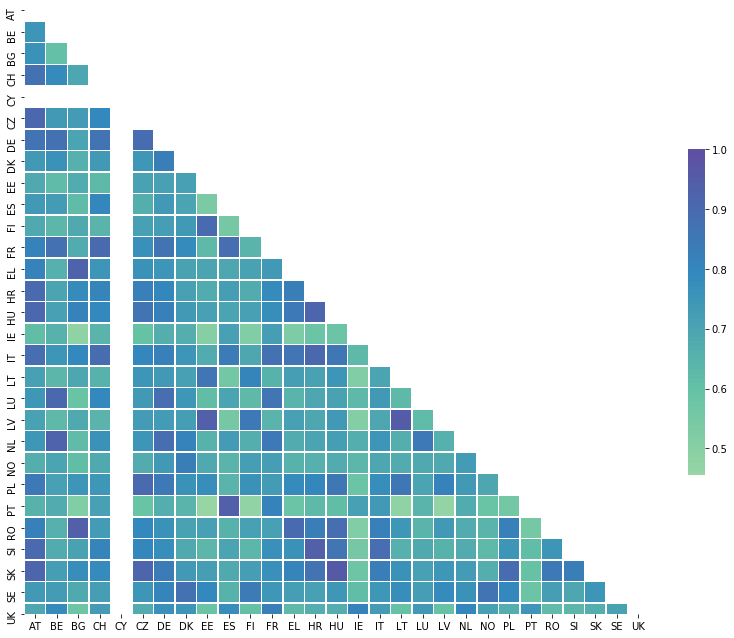

In [69]:
plot_corr(temp_df)

In [39]:
temp_df.corr()

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
AT,1.000000,0.749601,0.765090,0.876347,NaN,0.909702,0.872662,0.734989,0.682948,0.741216,0.684129,0.818610,0.814607,0.898507,0.910253,0.612152,0.885231,0.718576,0.747626,0.705084,0.748826,0.668562,0.844754,0.651676,0.819165,0.903626,0.915756,0.736815,0.691903
BE,0.749601,1.000000,0.607418,0.783341,NaN,0.741331,0.879252,0.765047,0.618847,0.728237,0.637988,0.879457,0.657969,0.696244,0.713581,0.655892,0.749515,0.635534,0.908572,0.631234,0.928219,0.696406,0.712331,0.675144,0.659074,0.678906,0.721657,0.731464,0.784455
BG,0.765090,0.607418,1.000000,0.692003,NaN,0.731137,0.701608,0.661784,0.675089,0.618740,0.681487,0.672908,0.925593,0.787146,0.813897,0.483709,0.792426,0.692573,0.593502,0.685791,0.623095,0.616645,0.753455,0.517871,0.940813,0.709415,0.776197,0.682691,0.577331
CH,0.876347,0.783341,0.692003,1.000000,NaN,0.793687,0.867553,0.740877,0.633202,0.801968,0.642677,0.902973,0.757181,0.806363,0.790308,0.645460,0.893287,0.651799,0.792787,0.646203,0.765541,0.683800,0.742819,0.714069,0.733889,0.810124,0.786611,0.724967,0.732575
CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZ,0.909702,0.741331,0.731137,0.793687,NaN,1.000000,0.893717,0.746034,0.709250,0.669622,0.712426,0.766871,0.764974,0.824989,0.874281,0.599322,0.802464,0.753115,0.741778,0.733339,0.750615,0.677934,0.905827,0.591682,0.793087,0.802672,0.919820,0.756306,0.680458
DE,0.872662,0.879252,0.701608,0.867553,NaN,0.893717,1.000000,0.833823,0.711990,0.738181,0.725480,0.870206,0.750469,0.798529,0.821402,0.669450,0.825729,0.739897,0.883641,0.729557,0.886637,0.741602,0.849142,0.667442,0.760481,0.780018,0.839101,0.808972,0.766544
DK,0.734989,0.765047,0.661784,0.740877,NaN,0.746034,0.833823,1.000000,0.714810,0.700224,0.738429,0.780902,0.704280,0.712281,0.734317,0.664593,0.751519,0.719119,0.742669,0.719597,0.814993,0.833069,0.760672,0.643164,0.704664,0.680860,0.734525,0.877539,0.756615
EE,0.682948,0.618847,0.675089,0.633202,NaN,0.709250,0.711990,0.714810,1.000000,0.534656,0.899212,0.630806,0.702533,0.675754,0.717004,0.506127,0.678805,0.865653,0.611881,0.936610,0.649503,0.683358,0.778007,0.455302,0.717269,0.635814,0.721442,0.791020,0.593354
ES,0.741216,0.728237,0.618740,0.801968,NaN,0.669622,0.738181,0.700224,0.534656,1.000000,0.547065,0.888815,0.693930,0.721852,0.703830,0.718998,0.836860,0.556953,0.697215,0.547745,0.729754,0.641740,0.641666,0.938181,0.653520,0.701537,0.684968,0.648965,0.775761


# HEATMAP month vs hours 

In [27]:
#df_country.duplicated().sum()

In [28]:
#df_country.isnull().sum()